#### TRABALHO FINAL DA DISCIPLINA − TÓPICOS AVANÇADOS EM PLN - 2021.2

Aluno: Daniel Moraes

Objetivos: Desenvolver o módulo de NLU (Natural Language Understanding) de um sistema para chatbot fim-a-fim que recebe dois textos em linguagem natural e define se o 2o texto é resposta para o 1o.texto.

Será fornecido um dataset com 180000 pares de sentenças que representam diálogos positivos, em inglês. Os diálogos negativos deverão ser “montados” pela equipe.

As equipes serão avaliadas pelos entregáveis e pelos resultados a partir de um conjunto de teste (dados não vistos – Held-Out Data) com 18000 pares de sentenças.

#### Produtos Entregáveis:

18/10/2021

- Pré-processamento, Lematização e POS Tagger, NER, etc.
- Estatística Descritiva do vocabulário constante no dataset, considerando os modelos de linguagem unigrama, bigrama, trigrama; analise da lei de potencia ou Lei de Zipf.
- Vetorização das Sentenças (features)

06/12/2021

- Model Fitted e Resultados do processo de treinamento
- Execução com Held-Out-Data (Dados não vistos)
- Artigo resumo com 4 paginas
- Apresentação Oral e Entrega do artigo: 06/12/2021

#### IMPORTACAO E INSTALAÇÃO DE BIBLIOTECAS, GPUS ETC

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sat Nov 20 12:05:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install --upgrade jupyter_http_over_ws>=0.0.7 && \
  jupyter serverextension enable --py jupyter_http_over_ws

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-serverextension", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/notebook/serverextensions.py", line 293, in start
    super(ServerExtensionApp, self).start()
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 256, in start
    self.subapp.start()
  File "/usr/local/lib/python2.7/dist-packages/notebook/serverextensions.py", line 210, in start
    self.toggle_server_extension_python(arg)
  File "/usr/local/lib/python2.7/dist-packages/notebook/serverextensions.py", line 199, in toggle_server_extension_python
    m, server_exts = _get_server_extension_meta

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
import random
import string
import seaborn as sns
from google.colab import drive
import spacy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
from functools import partial

In [ ]:
#Pacotes NLTK
import nltk
import re
import string
nltk.download('maxent_ne_chunker', quiet=True)
nltk.download('words', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('rslp', quiet=True)
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords as sw
from contextlib import redirect_stdout
from nltk.stem import PorterStemmer
from nltk.stem import RSLPStemmer
from nltk.tokenize import RegexpTokenizer 
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer 
from nltk.stem import WordNetLemmatizer 
from nltk.stem import RSLPStemmer
from nltk.text import TextCollection
from collections import defaultdict
import os
from pprint import pprint
import joblib

from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

#Download das stopwords
with redirect_stdout(open(os.devnull, "w")):
    nltk.download("stopwords", quiet=True) 
    nltk.download('punkt', quiet=True)
    nltk.download("all") 

In [ ]:
!pip install bert-for-tf2
!pip install sentencepiece
!python3 -m spacy download en
!pip install transformers
!pip install tensorflow==2.2.0-rc3
!pip install torchvision 

     |████████████████████████████████| 41 kB 164 kB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30534 sha256=97140248e9821e937bde5cee41e91d3bbbf079c53f4605b314cb2fe4337e3f79
  Stored in directory: /root/.cache/pip/wheels/47/b6/e5/8c76ec779f54bc5c2f1b57d2200bb9c77616da83873e8acb53
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19473 sha256=c224fefcf805678f35596ebd4a25c97197f2ccc784a24c2d5327b68b97bc2c6a
  Stored in directory: /root/.cache/pip/wheels/0e/fc/d2/a44fff33af0f233d7def6e7de413006d57c10e10ad736fe8f5
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7912 sha256=925891fa16fd6386327ec5d84c25d05f0c8744ea8158da9ab2b842a0b1c7a4d1
  Stored in directory: /root/.cache/pip/wheels/e1/11/67/33cc51bbee127cb8fb2ba549cd29109b2f22da43ddf9969716
Successfully built bert-for-tf2 params-flow py-params
     |████████████████████████████████| 1.2 MB 7.4 MB/s 
     |███████████████████████████

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import bert
tf.__version__

'2.2.0-rc3'

In [ ]:
!pip install tensorflow==2.4.1
#!pip install keras==2.4.3
tf.__version__

     |████████████████████████████████| 394.3 MB 13 kB/s 
     |████████████████████████████████| 5.8 MB 47.4 MB/s 
     |████████████████████████████████| 462 kB 47.1 MB/s 
     |████████████████████████████████| 3.8 MB 39.7 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68719 sha256=d380bd0ca0a5486ce192a0ce8daf99f16284b339b8cb43c7b8d97e205d9e85eb
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.13.3
    Uninstalling wrapt-1.13.3:
      Suc

'2.2.0-rc3'

In [ ]:
import torch
import torchvision

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


#### Produtos Entregáveis:

18/10/2021

- Pré-processamento, Lematização e POS Tagger, NER, etc.
- Estatística Descritiva do vocabulário constante no dataset, considerando os modelos de linguagem unigrama, bigrama, trigrama; analise da lei de potencia ou Lei de Zipf.
- Vetorização das Sentenças (features)

#### Tratamento inicial do texto

Converte o texto de cada sentença, separadamente, em minúsculo e remove espaços e tabulações extras. O resultado é guardado no DataFrame referente a cada sentenca em uma nova coluna.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = r"/content/drive/MyDrive/Colab Notebooks/TopicosPLN/"

In [ ]:
#Importando o Dataset
#df = pd.read_csv(path+'ChatBotDataset.xlsx', delimiter=';', encoding= 'mac_roman')
df = pd.read_excel(path+'ChatBotDataset.xlsx')

#conversão da coluna 'pair_ID' de inteiro para string
df['pair_ID'] = df['pair_ID'].astype('str')

#Visualização do Cabeçalho dos dados
df.head()

,pair_ID,message,response,entailment_label
0,0,b'have you heard of the upcoming black panther...,b'i have and i am so in love with the trailer ...,POSITIVE
1,1,b'it looks remarkable so far!\r\n',b'chadwick really is a good actor for black pa...,POSITIVE
2,2,b'i agree!. he really is suitable for the role...,b'the trailer was kind of sad though.\r\n',POSITIVE
3,3,b'how so? did it bother you when his father di...,"b'yes, it did, but i hope he become one of the...",POSITIVE
4,4,b'i second that statement!\r\n',b'but the movie will be a while until it is re...,POSITIVE


In [ ]:
df.count()

pair_ID             320002
message             320002
response            320002
entailment_label    320002
dtype: int64

In [ ]:
#Função para tratar o texto
def tratamento_texto(sentence):

  #remove as quebras de linha
  sentence = re.sub(r'\n', '', sentence)
  #substitui tabulações por um espaço em branco
  sentence = re.sub(r'\t', ' ', sentence)
  #substitui um ou mais espaços em branco por um espaço
  sentence= re.sub(r'\s+', ' ', sentence, flags=re.I)
  #remove aspas e apóstofres
  sentence = re.sub('["‘’“”…]', '', sentence)  

  #Principais remoções
  sentence = sentence.replace('\\r', '')
  sentence = sentence.replace('\\n', '')
  
  #remove o b'
  sentence = sentence.replace("b'", "")
  sentence = sentence.replace("''", "")
  #remove o \r\n'
  sentence= re.sub("[\r\n']", ' ', sentence)
  sentence= re.sub("[\r\n]", ' ', sentence) 

  sentence= re.sub("[!,]", ' ', sentence)
  sentence= re.sub("[!.]", ' ', sentence) 
  sentence= re.sub("[?.]", ' ', sentence)
  sentence= re.sub("[?,]", ' ', sentence) 

  return sentence

#cria uma nova coluna no dataframe 'sentence' com cada sentence tokenizado
df['message_tratado'] = df['message'].apply(tratamento_texto)
df['response_tratado'] = df['response'].apply(tratamento_texto)
#Exibe o resultado
df[df.columns[::-1]].head()

,response_tratado,message_tratado,entailment_label,response,message,pair_ID
0,i have and i am so in love with the trailer al...,have you heard of the upcoming black panther m...,POSITIVE,b'i have and i am so in love with the trailer ...,b'have you heard of the upcoming black panther...,0
1,chadwick really is a good actor for black pant...,it looks remarkable so far,POSITIVE,b'chadwick really is a good actor for black pa...,b'it looks remarkable so far!\r\n',1
2,the trailer was kind of sad though,i agree he really is suitable for the role,POSITIVE,b'the trailer was kind of sad though.\r\n',b'i agree!. he really is suitable for the role...,2
3,yes it did but i hope he become one of the b...,how so did it bother you when his father died,POSITIVE,"b'yes, it did, but i hope he become one of the...",b'how so? did it bother you when his father di...,3
4,but the movie will be a while until it is rele...,i second that statement,POSITIVE,b'but the movie will be a while until it is re...,b'i second that statement!\r\n',4


In [ ]:
#Funcao para separar as sentenças
def separa_sentencas(texto):
  lista_sentencas = sent_tokenize(texto)
  nova_lista = []
  for sent in lista_sentencas:
    nova_lista.append(sent.strip())
  return nova_lista

#cria uma nova coluna no dataframe 'sentence' com cada sentence tokenizado
df['message_em_sentencas'] = df['message_tratado'].apply(separa_sentencas)
df['response_em_sentencas'] = df['response_tratado'].apply(separa_sentencas)
#Exibe o resultado
df[df.columns[::-1]].head()

,response_em_sentencas,message_em_sentencas,response_tratado,message_tratado,entailment_label,response,message,pair_ID
0,[i have and i am so in love with the trailer a...,[have you heard of the upcoming black panther ...,i have and i am so in love with the trailer al...,have you heard of the upcoming black panther m...,POSITIVE,b'i have and i am so in love with the trailer ...,b'have you heard of the upcoming black panther...,0
1,[chadwick really is a good actor for black pan...,[it looks remarkable so far],chadwick really is a good actor for black pant...,it looks remarkable so far,POSITIVE,b'chadwick really is a good actor for black pa...,b'it looks remarkable so far!\r\n',1
2,[the trailer was kind of sad though],[i agree he really is suitable for the role],the trailer was kind of sad though,i agree he really is suitable for the role,POSITIVE,b'the trailer was kind of sad though.\r\n',b'i agree!. he really is suitable for the role...,2
3,[yes it did but i hope he become one of the ...,[how so did it bother you when his father died],yes it did but i hope he become one of the b...,how so did it bother you when his father died,POSITIVE,"b'yes, it did, but i hope he become one of the...",b'how so? did it bother you when his father di...,3
4,[but the movie will be a while until it is rel...,[i second that statement],but the movie will be a while until it is rele...,i second that statement,POSITIVE,b'but the movie will be a while until it is re...,b'i second that statement!\r\n',4


In [ ]:
#Funcao para tokenizar - separar as sentenças
def tokeniza_sentenca(lista_sentencas):
  tokens = ''
  for i in range (len(lista_sentencas)):
    sentencas_unidas = " ".join(w for w in lista_sentencas)
    sentence = sent_tokenize(sentencas_unidas)
    tokens = word_tokenize(sentence[i])
  return tokens

#cria uma nova coluna no dataframe 'sentence' com cada sentence tokenizado
df['message_tokenizado'] = df['message_em_sentencas'].apply(tokeniza_sentenca)
df['response_tokenizado'] = df['response_em_sentencas'].apply(tokeniza_sentenca)
#Exibe o resultado
df[df.columns[::-1]].head()

,response_tokenizado,message_tokenizado,response_em_sentencas,message_em_sentencas,response_tratado,message_tratado,entailment_label,response,message,pair_ID
0,"[i, have, and, i, am, so, in, love, with, the,...","[have, you, heard, of, the, upcoming, black, p...",[i have and i am so in love with the trailer a...,[have you heard of the upcoming black panther ...,i have and i am so in love with the trailer al...,have you heard of the upcoming black panther m...,POSITIVE,b'i have and i am so in love with the trailer ...,b'have you heard of the upcoming black panther...,0
1,"[chadwick, really, is, a, good, actor, for, bl...","[it, looks, remarkable, so, far]",[chadwick really is a good actor for black pan...,[it looks remarkable so far],chadwick really is a good actor for black pant...,it looks remarkable so far,POSITIVE,b'chadwick really is a good actor for black pa...,b'it looks remarkable so far!\r\n',1
2,"[the, trailer, was, kind, of, sad, though]","[i, agree, he, really, is, suitable, for, the,...",[the trailer was kind of sad though],[i agree he really is suitable for the role],the trailer was kind of sad though,i agree he really is suitable for the role,POSITIVE,b'the trailer was kind of sad though.\r\n',b'i agree!. he really is suitable for the role...,2
3,"[yes, it, did, but, i, hope, he, become, one, ...","[how, so, did, it, bother, you, when, his, fat...",[yes it did but i hope he become one of the ...,[how so did it bother you when his father died],yes it did but i hope he become one of the b...,how so did it bother you when his father died,POSITIVE,"b'yes, it did, but i hope he become one of the...",b'how so? did it bother you when his father di...,3
4,"[but, the, movie, will, be, a, while, until, i...","[i, second, that, statement]",[but the movie will be a while until it is rel...,[i second that statement],but the movie will be a while until it is rele...,i second that statement,POSITIVE,b'but the movie will be a while until it is re...,b'i second that statement!\r\n',4


In [ ]:
#Remover palavras que não são importantes para a contabilizaçao
def remove_stop_words(lista_tokens):
  stopwords = sw.words('english')
  stop_words = set(stopwords + list(string.punctuation))
  tokens = [w for w in lista_tokens if not w in stop_words]
  return tokens

#cria uma nova coluna no dataframe sem stopwords
df['message_sem_stopwords'] = df['message_tokenizado'].apply(remove_stop_words)
df['response_sem_stopwords'] = df['response_tokenizado'].apply(remove_stop_words)
#Exibe o resultado
df[df.columns[::-1]].head()

,response_sem_stopwords,message_sem_stopwords,response_tokenizado,message_tokenizado,response_em_sentencas,message_em_sentencas,response_tratado,message_tratado,entailment_label,response,message,pair_ID
0,"[love, trailer, already]","[heard, upcoming, black, panther, movie]","[i, have, and, i, am, so, in, love, with, the,...","[have, you, heard, of, the, upcoming, black, p...",[i have and i am so in love with the trailer a...,[have you heard of the upcoming black panther ...,i have and i am so in love with the trailer al...,have you heard of the upcoming black panther m...,POSITIVE,b'i have and i am so in love with the trailer ...,b'have you heard of the upcoming black panther...,0
1,"[chadwick, really, good, actor, black, panther]","[looks, remarkable, far]","[chadwick, really, is, a, good, actor, for, bl...","[it, looks, remarkable, so, far]",[chadwick really is a good actor for black pan...,[it looks remarkable so far],chadwick really is a good actor for black pant...,it looks remarkable so far,POSITIVE,b'chadwick really is a good actor for black pa...,b'it looks remarkable so far!\r\n',1
2,"[trailer, kind, sad, though]","[agree, really, suitable, role]","[the, trailer, was, kind, of, sad, though]","[i, agree, he, really, is, suitable, for, the,...",[the trailer was kind of sad though],[i agree he really is suitable for the role],the trailer was kind of sad though,i agree he really is suitable for the role,POSITIVE,b'the trailer was kind of sad though.\r\n',b'i agree!. he really is suitable for the role...,2
3,"[yes, hope, become, one, best, super, heroes]","[bother, father, died]","[yes, it, did, but, i, hope, he, become, one, ...","[how, so, did, it, bother, you, when, his, fat...",[yes it did but i hope he become one of the ...,[how so did it bother you when his father died],yes it did but i hope he become one of the b...,how so did it bother you when his father died,POSITIVE,"b'yes, it did, but i hope he become one of the...",b'how so? did it bother you when his father di...,3
4,"[movie, released, lets, hope, good, trailer, s...","[second, statement]","[but, the, movie, will, be, a, while, until, i...","[i, second, that, statement]",[but the movie will be a while until it is rel...,[i second that statement],but the movie will be a while until it is rele...,i second that statement,POSITIVE,b'but the movie will be a while until it is re...,b'i second that statement!\r\n',4


In [ ]:
#Funcao para o POS TAGGING 
def Postagging(sentence):
    phrase = []
    for word in sentence:
        phrase.append(nltk.pos_tag(word.lower()))
    return phrase

#cria uma nova coluna no dataframe com o Postagging
df['message_postagging'] = df['message_sem_stopwords'].apply(Postagging)
df['response_postagging'] = df['response_sem_stopwords'].apply(Postagging)
#Exibe o resultado
df[df.columns[::-1]].head()

,response_postagging,message_postagging,response_sem_stopwords,message_sem_stopwords,response_tokenizado,message_tokenizado,response_em_sentencas,message_em_sentencas,response_tratado,message_tratado,entailment_label,response,message,pair_ID
0,"[[(l, NN), (o, MD), (v, VB), (e, NN)], [(t, NN...","[[(h, NN), (e, VBZ), (a, DT), (r, NN), (d, NN)...","[love, trailer, already]","[heard, upcoming, black, panther, movie]","[i, have, and, i, am, so, in, love, with, the,...","[have, you, heard, of, the, upcoming, black, p...",[i have and i am so in love with the trailer a...,[have you heard of the upcoming black panther ...,i have and i am so in love with the trailer al...,have you heard of the upcoming black panther m...,POSITIVE,b'i have and i am so in love with the trailer ...,b'have you heard of the upcoming black panther...,0
1,"[[(c, NNS), (h, VBP), (a, DT), (d, NN), (w, NN...","[[(l, NN), (o, MD), (o, VB), (k, NN), (s, NN)]...","[chadwick, really, good, actor, black, panther]","[looks, remarkable, far]","[chadwick, really, is, a, good, actor, for, bl...","[it, looks, remarkable, so, far]",[chadwick really is a good actor for black pan...,[it looks remarkable so far],chadwick really is a good actor for black pant...,it looks remarkable so far,POSITIVE,b'chadwick really is a good actor for black pa...,b'it looks remarkable so far!\r\n',1
2,"[[(t, NN), (r, VBZ), (a, DT), (i, JJ), (l, NN)...","[[(a, DT), (g, NN), (r, NN), (e, NN), (e, NN)]...","[trailer, kind, sad, though]","[agree, really, suitable, role]","[the, trailer, was, kind, of, sad, though]","[i, agree, he, really, is, suitable, for, the,...",[the trailer was kind of sad though],[i agree he really is suitable for the role],the trailer was kind of sad though,i agree he really is suitable for the role,POSITIVE,b'the trailer was kind of sad though.\r\n',b'i agree!. he really is suitable for the role...,2
3,"[[(y, NN), (e, NN), (s, NN)], [(h, NN), (o, MD...","[[(b, NN), (o, NN), (t, NN), (h, NN), (e, NN),...","[yes, hope, become, one, best, super, heroes]","[bother, father, died]","[yes, it, did, but, i, hope, he, become, one, ...","[how, so, did, it, bother, you, when, his, fat...",[yes it did but i hope he become one of the ...,[how so did it bother you when his father died],yes it did but i hope he become one of the b...,how so did it bother you when his father died,POSITIVE,"b'yes, it did, but i hope he become one of the...",b'how so? did it bother you when his father di...,3
4,"[[(m, NN), (o, IN), (v, NN), (i, NN), (e, VBP)...","[[(s, NN), (e, NN), (c, VBP), (o, JJ), (n, JJ)...","[movie, released, lets, hope, good, trailer, s...","[second, statement]","[but, the, movie, will, be, a, while, until, i...","[i, second, that, statement]",[but the movie will be a while until it is rel...,[i second that statement],but the movie will be a while until it is rele...,i second that statement,POSITIVE,b'but the movie will be a while until it is re...,b'i second that statement!\r\n',4


In [ ]:
#Funcao para stemmingzar (tratar o radical da palavra, até a origem)
def Stemming(sentence):
    stemmer = PorterStemmer()
    phrase = []
    for word in sentence:
        phrase.append(stemmer.stem(word.lower()))
    return phrase

#cria uma nova coluna no dataframe com a raiz de tokens
df['message_raiz'] = df['message_sem_stopwords'].apply(Stemming)
df['response_raiz'] = df['response_sem_stopwords'].apply(Stemming)
#Exibe o resultado
df[df.columns[::-1]].head()

,response_raiz,message_raiz,response_postagging,message_postagging,response_sem_stopwords,message_sem_stopwords,response_tokenizado,message_tokenizado,response_em_sentencas,message_em_sentencas,response_tratado,message_tratado,entailment_label,response,message,pair_ID
0,"[love, trailer, alreadi]","[heard, upcom, black, panther, movi]","[[(l, NN), (o, MD), (v, VB), (e, NN)], [(t, NN...","[[(h, NN), (e, VBZ), (a, DT), (r, NN), (d, NN)...","[love, trailer, already]","[heard, upcoming, black, panther, movie]","[i, have, and, i, am, so, in, love, with, the,...","[have, you, heard, of, the, upcoming, black, p...",[i have and i am so in love with the trailer a...,[have you heard of the upcoming black panther ...,i have and i am so in love with the trailer al...,have you heard of the upcoming black panther m...,POSITIVE,b'i have and i am so in love with the trailer ...,b'have you heard of the upcoming black panther...,0
1,"[chadwick, realli, good, actor, black, panther]","[look, remark, far]","[[(c, NNS), (h, VBP), (a, DT), (d, NN), (w, NN...","[[(l, NN), (o, MD), (o, VB), (k, NN), (s, NN)]...","[chadwick, really, good, actor, black, panther]","[looks, remarkable, far]","[chadwick, really, is, a, good, actor, for, bl...","[it, looks, remarkable, so, far]",[chadwick really is a good actor for black pan...,[it looks remarkable so far],chadwick really is a good actor for black pant...,it looks remarkable so far,POSITIVE,b'chadwick really is a good actor for black pa...,b'it looks remarkable so far!\r\n',1
2,"[trailer, kind, sad, though]","[agre, realli, suitabl, role]","[[(t, NN), (r, VBZ), (a, DT), (i, JJ), (l, NN)...","[[(a, DT), (g, NN), (r, NN), (e, NN), (e, NN)]...","[trailer, kind, sad, though]","[agree, really, suitable, role]","[the, trailer, was, kind, of, sad, though]","[i, agree, he, really, is, suitable, for, the,...",[the trailer was kind of sad though],[i agree he really is suitable for the role],the trailer was kind of sad though,i agree he really is suitable for the role,POSITIVE,b'the trailer was kind of sad though.\r\n',b'i agree!. he really is suitable for the role...,2
3,"[ye, hope, becom, one, best, super, hero]","[bother, father, die]","[[(y, NN), (e, NN), (s, NN)], [(h, NN), (o, MD...","[[(b, NN), (o, NN), (t, NN), (h, NN), (e, NN),...","[yes, hope, become, one, best, super, heroes]","[bother, father, died]","[yes, it, did, but, i, hope, he, become, one, ...","[how, so, did, it, bother, you, when, his, fat...",[yes it did but i hope he become one of the ...,[how so did it bother you when his father died],yes it did but i hope he become one of the b...,how so did it bother you when his father died,POSITIVE,"b'yes, it did, but i hope he become one of the...",b'how so? did it bother you when his father di...,3
4,"[movi, releas, let, hope, good, trailer, show,...","[second, statement]","[[(m, NN), (o, IN), (v, NN), (i, NN), (e, VBP)...","[[(s, NN), (e, NN), (c, VBP), (o, JJ), (n, JJ)...","[movie, released, lets, hope, good, trailer, s...","[second, statement]","[but, the, movie, will, be, a, while, until, i...","[i, second, that, statement]",[but the movie will be a while until it is rel...,[i second that statement],but the movie will be a while until it is rele...,i second that statement,POSITIVE,b'but the movie will be a while until it is re...,b'i second that statement!\r\n',4


In [ ]:
#Funcao para Lematizar: processo de agrupar formas flexionadas em uma só palavra com similar.
def Lematizar(sentence):
    lemmatizer = WordNetLemmatizer()

    for i in range (len(sentence)):
        words = nltk.word_tokenize(sentence[i])
        newwords = [lemmatizer.lemmatize(word) for word in words]
        sentence[i] = ' '.join(newwords)
    return sentence

#cria uma nova coluna com o texto com formas flexionadas
df['message_lematizado'] = df['message_raiz'].apply(Lematizar)
df['response_lematizado'] = df['response_raiz'].apply(Lematizar)
#Exibe o resultado
df[df.columns[::-1]].head()

,response_lematizado,message_lematizado,response_raiz,message_raiz,response_postagging,message_postagging,response_sem_stopwords,message_sem_stopwords,response_tokenizado,message_tokenizado,response_em_sentencas,message_em_sentencas,response_tratado,message_tratado,entailment_label,response,message,pair_ID
0,"[love, trailer, alreadi]","[heard, upcom, black, panther, movi]","[love, trailer, alreadi]","[heard, upcom, black, panther, movi]","[[(l, NN), (o, MD), (v, VB), (e, NN)], [(t, NN...","[[(h, NN), (e, VBZ), (a, DT), (r, NN), (d, NN)...","[love, trailer, already]","[heard, upcoming, black, panther, movie]","[i, have, and, i, am, so, in, love, with, the,...","[have, you, heard, of, the, upcoming, black, p...",[i have and i am so in love with the trailer a...,[have you heard of the upcoming black panther ...,i have and i am so in love with the trailer al...,have you heard of the upcoming black panther m...,POSITIVE,b'i have and i am so in love with the trailer ...,b'have you heard of the upcoming black panther...,0
1,"[chadwick, realli, good, actor, black, panther]","[look, remark, far]","[chadwick, realli, good, actor, black, panther]","[look, remark, far]","[[(c, NNS), (h, VBP), (a, DT), (d, NN), (w, NN...","[[(l, NN), (o, MD), (o, VB), (k, NN), (s, NN)]...","[chadwick, really, good, actor, black, panther]","[looks, remarkable, far]","[chadwick, really, is, a, good, actor, for, bl...","[it, looks, remarkable, so, far]",[chadwick really is a good actor for black pan...,[it looks remarkable so far],chadwick really is a good actor for black pant...,it looks remarkable so far,POSITIVE,b'chadwick really is a good actor for black pa...,b'it looks remarkable so far!\r\n',1
2,"[trailer, kind, sad, though]","[agre, realli, suitabl, role]","[trailer, kind, sad, though]","[agre, realli, suitabl, role]","[[(t, NN), (r, VBZ), (a, DT), (i, JJ), (l, NN)...","[[(a, DT), (g, NN), (r, NN), (e, NN), (e, NN)]...","[trailer, kind, sad, though]","[agree, really, suitable, role]","[the, trailer, was, kind, of, sad, though]","[i, agree, he, really, is, suitable, for, the,...",[the trailer was kind of sad though],[i agree he really is suitable for the role],the trailer was kind of sad though,i agree he really is suitable for the role,POSITIVE,b'the trailer was kind of sad though.\r\n',b'i agree!. he really is suitable for the role...,2
3,"[ye, hope, becom, one, best, super, hero]","[bother, father, die]","[ye, hope, becom, one, best, super, hero]","[bother, father, die]","[[(y, NN), (e, NN), (s, NN)], [(h, NN), (o, MD...","[[(b, NN), (o, NN), (t, NN), (h, NN), (e, NN),...","[yes, hope, become, one, best, super, heroes]","[bother, father, died]","[yes, it, did, but, i, hope, he, become, one, ...","[how, so, did, it, bother, you, when, his, fat...",[yes it did but i hope he become one of the ...,[how so did it bother you when his father died],yes it did but i hope he become one of the b...,how so did it bother you when his father died,POSITIVE,"b'yes, it did, but i hope he become one of the...",b'how so? did it bother you when his father di...,3
4,"[movi, releas, let, hope, good, trailer, show, u]","[second, statement]","[movi, releas, let, hope, good, trailer, show, u]","[second, statement]","[[(m, NN), (o, IN), (v, NN), (i, NN), (e, VBP)...","[[(s, NN), (e, NN), (c, VBP), (o, JJ), (n, JJ)...","[movie, released, lets, hope, good, trailer, s...","[second, statement]","[but, the, movie, will, be, a, while, until, i...","[i, second, that, statement]",[but the movie will be a while until it is rel...,[i second that statement],but the movie will be a while until it is rele...,i second that statement,POSITIVE,b'but the movie will be a while until it is re...,b'i second that statement!\r\n',4


In [ ]:
#Funcao para aplicar o LER nas setencas
def Ner(sentence):
    doc = nlp(sentence) 
    phrase = []
    for ent in doc.ents:
        phrase.append(ent.text, ent.start_char, ent.end_char, ent.label_)
    return phrase

#cria uma nova coluna com o texto com as entidades identificadas
df['message_NER'] = df['message_lematizado'].apply(Lematizar)
df['response_NER'] = df['response_lematizado'].apply(Lematizar)
#Exibe o resultado
df[df.columns[::-1]].head()

,response_NER,message_NER,response_lematizado,message_lematizado,response_raiz,message_raiz,response_postagging,message_postagging,response_sem_stopwords,message_sem_stopwords,response_tokenizado,message_tokenizado,response_em_sentencas,message_em_sentencas,response_tratado,message_tratado,entailment_label,response,message,pair_ID
0,"[love, trailer, alreadi]","[heard, upcom, black, panther, movi]","[love, trailer, alreadi]","[heard, upcom, black, panther, movi]","[love, trailer, alreadi]","[heard, upcom, black, panther, movi]","[[(l, NN), (o, MD), (v, VB), (e, NN)], [(t, NN...","[[(h, NN), (e, VBZ), (a, DT), (r, NN), (d, NN)...","[love, trailer, already]","[heard, upcoming, black, panther, movie]","[i, have, and, i, am, so, in, love, with, the,...","[have, you, heard, of, the, upcoming, black, p...",[i have and i am so in love with the trailer a...,[have you heard of the upcoming black panther ...,i have and i am so in love with the trailer al...,have you heard of the upcoming black panther m...,POSITIVE,b'i have and i am so in love with the trailer ...,b'have you heard of the upcoming black panther...,0
1,"[chadwick, realli, good, actor, black, panther]","[look, remark, far]","[chadwick, realli, good, actor, black, panther]","[look, remark, far]","[chadwick, realli, good, actor, black, panther]","[look, remark, far]","[[(c, NNS), (h, VBP), (a, DT), (d, NN), (w, NN...","[[(l, NN), (o, MD), (o, VB), (k, NN), (s, NN)]...","[chadwick, really, good, actor, black, panther]","[looks, remarkable, far]","[chadwick, really, is, a, good, actor, for, bl...","[it, looks, remarkable, so, far]",[chadwick really is a good actor for black pan...,[it looks remarkable so far],chadwick really is a good actor for black pant...,it looks remarkable so far,POSITIVE,b'chadwick really is a good actor for black pa...,b'it looks remarkable so far!\r\n',1
2,"[trailer, kind, sad, though]","[agre, realli, suitabl, role]","[trailer, kind, sad, though]","[agre, realli, suitabl, role]","[trailer, kind, sad, though]","[agre, realli, suitabl, role]","[[(t, NN), (r, VBZ), (a, DT), (i, JJ), (l, NN)...","[[(a, DT), (g, NN), (r, NN), (e, NN), (e, NN)]...","[trailer, kind, sad, though]","[agree, really, suitable, role]","[the, trailer, was, kind, of, sad, though]","[i, agree, he, really, is, suitable, for, the,...",[the trailer was kind of sad though],[i agree he really is suitable for the role],the trailer was kind of sad though,i agree he really is suitable for the role,POSITIVE,b'the trailer was kind of sad though.\r\n',b'i agree!. he really is suitable for the role...,2
3,"[ye, hope, becom, one, best, super, hero]","[bother, father, die]","[ye, hope, becom, one, best, super, hero]","[bother, father, die]","[ye, hope, becom, one, best, super, hero]","[bother, father, die]","[[(y, NN), (e, NN), (s, NN)], [(h, NN), (o, MD...","[[(b, NN), (o, NN), (t, NN), (h, NN), (e, NN),...","[yes, hope, become, one, best, super, heroes]","[bother, father, died]","[yes, it, did, but, i, hope, he, become, one, ...","[how, so, did, it, bother, you, when, his, fat...",[yes it did but i hope he become one of the ...,[how so did it bother you when his father died],yes it did but i hope he become one of the b...,how so did it bother you when his father died,POSITIVE,"b'yes, it did, but i hope he become one of the...",b'how so? did it bother you when his father di...,3
4,"[movi, releas, let, hope, good, trailer, show, u]","[second, statement]","[movi, releas, let, hope, good, trailer, show, u]","[second, statement]","[movi, releas, let, hope, good, trailer, show, u]","[second, statement]","[[(m, NN), (o, IN), (v, NN), (i, NN), (e, VBP)...","[[(s, NN), (e, NN), (c, VBP), (o, JJ), (n, JJ)...","[movie, released, lets, hope, good, trailer, s...","[second, statement]","[but, the, movie, will, be, a, while, until, i...","[i, second, that, statement]",[but the movie will be a while until it is rel...,[i second that statement],but the movie will be a while until it is rele...,i second that stat

In [ ]:
#Funcao para aplicar a vetorização TFIDF
def vetorizeTFIDF(corpus):
    corpus_aux = [list(doc) for doc in corpus]
    texts = TextCollection(corpus_aux)      
    features = defaultdict(float)
    for doc in corpus_aux:
        for token in doc:
            features[token] = texts.tf_idf(token,doc)
    return features 

#cria uma nova coluna com o texto com as entidades identificadas
df['message_vetorizado_TFIDF'] = df['message_lematizado'].apply(vetorizeTFIDF)
df['response_vetorizado_TFIDF'] = df['response_lematizado'].apply(vetorizeTFIDF)
#Exibe o resultado
df[df.columns[::-1]].head()

,response_vetorizado_TFIDF,message_vetorizado_TFIDF,response_NER,message_NER,response_lematizado,message_lematizado,response_raiz,message_raiz,response_postagging,message_postagging,response_sem_stopwords,message_sem_stopwords,response_tokenizado,message_tokenizado,response_em_sentencas,message_em_sentencas,response_tratado,message_tratado,entailment_label,response,message,pair_ID
0,"{'l': 0.0, 'o': 0.27465307216702745, 'v': 0.27...","{'h': 0.13089867598202215, 'e': 0.130898675982...","[love, trailer, alreadi]","[heard, upcom, black, panther, movi]","[love, trailer, alreadi]","[heard, upcom, black, panther, movi]","[love, trailer, alreadi]","[heard, upcom, black, panther, movi]","[[(l, NN), (o, MD), (v, VB), (e, NN)], [(t, NN...","[[(h, NN), (e, VBZ), (a, DT), (r, NN), (d, NN)...","[love, trailer, already]","[heard, upcoming, black, panther, movie]","[i, have, and, i, am, so, in, love, with, the,...","[have, you, heard, of, the, upcoming, black, p...",[i have and i am so in love with the trailer a...,[have you heard of the upcoming black panther ...,i have and i am so in love with the trailer al...,have you heard of the upcoming black panther m...,POSITIVE,b'i have and i am so in love with the trailer ...,b'have you heard of the upcoming black panther...,0
1,"{'c': 0.13862943611198905, 'h': 0.156944612666...","{'l': 0.27465307216702745, 'o': 0.549306144334...","[chadwick, realli, good, actor, black, panther]","[look, remark, far]","[chadwick, realli, good, actor, black, panther]","[look, remark, far]","[chadwick, realli, good, actor, black, panther]","[look, remark, far]","[[(c, NNS), (h, VBP), (a, DT), (d, NN), (w, NN...","[[(l, NN), (o, MD), (o, VB), (k, NN), (s, NN)]...","[chadwick, really, good, actor, black, panther]","[looks, remarkable, far]","[chadwick, really, is, a, good, actor, for, bl...","[it, looks, remarkable, so, far]",[chadwick really is a good actor for black pan...,[it looks remarkable so far],chadwick really is a good actor for black pant...,it looks remarkable so far,POSITIVE,b'chadwick really is a good actor for black pa...,b'it looks remarkable so far!\r\n',1
2,"{'t': 0.11552453009332421, 'r': 0.396084103177...","{'a': 0.04109743892168297, 'g': 0.346573590279...","[trailer, kind, sad, though]","[agre, realli, suitabl, role]","[trailer, kind, sad, though]","[agre, realli, suitabl, role]","[trailer, kind, sad, though]","[agre, realli, suitabl, role]","[[(t, NN), (r, VBZ), (a, DT), (i, JJ), (l, NN)...","[[(a, DT), (g, NN), (r, NN), (e, NN), (e, NN)]...","[trailer, kind, sad, though]","[agree, really, suitable, role]","[the, trailer, was, kind, of, sad, though]","[i, agree, he, really, is, suitable, for, the,...",[the trailer was kind of sad though],[i agree he really is suitable for the role],the trailer was kind of sad though,i agree he really is suitable for the role,POSITIVE,b'the trailer was kind of sad though.\r\n',b'i agree!. he really is suitable for the role...,2
3,"{'y': 0.9729550745276566, 'e': 0.0, 'h': 0.313...","{'b': 0.1831020481113516, 'o': 0.1831020481113...","[ye, hope, becom, one, best, super, hero]","[bother, father, die]","[ye, hope, becom, one, best, super, hero]","[bother, father, die]","[ye, hope, becom, one, best, super, hero]","[bother, father, die]","[[(y, NN), (e, NN), (s, NN)], [(h, NN), (o, MD...","[[(b, NN), (o, NN), (t, NN), (h, NN), (e, NN),...","[yes, hope, become, one, best, super, heroes]","[bother, father, died]","[yes, it, did, but, i, hope, he, become, one, ...","[how, so, did, it, bother, you, when, his, fat...",[yes it did but i hope he become one of the ...,[how so did it bother you when his father died],yes it did but i hope he become one of the b...,how so did it bother you when his father died,POSITIVE,"b'yes, it did, but i hope he become one of the...",b'how so? did it bother you when his father di...,3
4,"{'m': 0.5198603854199589, 'o': 0.1732867951399...","{'s': 0.0, 'e': 0.0, 'c': 0.11552453009332421,...","[movi, releas, let, hope, good, trailer, show, u]","[se

In [ ]:
pln = spacy.load('en')
pln

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = STOP_WORDS
print(stop_words)

{'yourselves', 'alone', 'so', 'n‘t', 'into', 'nothing', 'because', 'whereas', 'enough', 'further', 'itself', 'what', 'five', "'re", 'does', 'was', 'then', 'are', 'himself', 'too', '‘m', 'beyond', 'ourselves', 'beside', 'each', 'nine', 'forty', 'to', 'make', 'yet', 'under', 'whether', 'its', 'between', 'anywhere', 'after', "'ll", 'hers', 'off', 'thereupon', 'how', 'has', 'though', 'herein', 'do', 'former', 'became', 'twelve', 'call', 'whither', 'she', 'indeed', 'seems', 'i', 'eight', 'two', 'therein', 'seemed', 'three', 'your', 'hundred', 'must', 'also', 'wherever', 'every', 'he', 'amount', 'if', 'within', 'since', '’ve', 'becomes', 'there', 'show', 'part', 'eleven', 'where', 'which', 'empty', '‘re', 'another', 'seem', 'for', 'meanwhile', 'with', 'hereafter', 'onto', 'it', 'yourself', 'done', "'ve", 'beforehand', 'everything', 'become', 'various', 'four', 'you', 'most', '’s', 'why', 'herself', 'thus', 'before', 'they', 'many', 'other', 'nevertheless', 'although', 'n’t', 'not', 'sometime

In [ ]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
len(stop_words)

326

In [ ]:
#Outra Função para tratar o texto
def tratamento_texto(sentence):
  
  #remove as quebras de linha
  sentence = re.sub(r'\n', '', sentence)
  #substitui tabulações por um espaço em branco
  sentence = re.sub(r'\t', ' ', sentence)
  #substitui um ou mais espaços em branco por um espaço
  sentence= re.sub(r'\s+', ' ', sentence, flags=re.I)
  #&amp;
  #remove aspas e apóstofres
  sentence = re.sub('["‘’“”…]', '', sentence)
  return sentence

def clean_tweet(tweet):
    tweet = BeautifulSoup(tweet, "lxml").get_text()
    tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
    tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)
    tweet = re.sub(r"[^a-zA-Z.!?']", ' ', tweet)
    tweet = re.sub(r" +", ' ', tweet)
    return tweet

def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)
  
  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

#cria uma nova coluna no dataframe 'sentence' com cada sentence tokenizado
df['message_tratado'] = df['message'].apply(tratamento_texto).apply(preprocessamento)
df['response_tratado'] = df['response'].apply(tratamento_texto).apply(preprocessamento)
#Exibe o resultado
df[df.columns[::-1]].head()

,response_vetorizado_TFIDF,message_vetorizado_TFIDF,response_NER,message_NER,response_lematizado,message_lematizado,response_raiz,message_raiz,response_postagging,message_postagging,response_sem_stopwords,message_sem_stopwords,response_tokenizado,message_tokenizado,response_em_sentencas,message_em_sentencas,response_tratado,message_tratado,entailment_label,response,message,pair_ID
0,"{'l': 0.0, 'o': 0.27465307216702745, 'v': 0.27...","{'h': 0.13089867598202215, 'e': 0.130898675982...","[love, trailer, alreadi]","[heard, upcom, black, panther, movi]","[love, trailer, alreadi]","[heard, upcom, black, panther, movi]","[love, trailer, alreadi]","[heard, upcom, black, panther, movi]","[[(l, NN), (o, MD), (v, VB), (e, NN)], [(t, NN...","[[(h, NN), (e, VBZ), (a, DT), (r, NN), (d, NN)...","[love, trailer, already]","[heard, upcoming, black, panther, movie]","[i, have, and, i, am, so, in, love, with, the,...","[have, you, heard, of, the, upcoming, black, p...",[i have and i am so in love with the trailer a...,[have you heard of the upcoming black panther ...,b'i love trailer already!\r\n,b'have -PRON- hear upcoming black panther movi...,POSITIVE,b'i have and i am so in love with the trailer ...,b'have you heard of the upcoming black panther...,0
1,"{'c': 0.13862943611198905, 'h': 0.156944612666...","{'l': 0.27465307216702745, 'o': 0.549306144334...","[chadwick, realli, good, actor, black, panther]","[look, remark, far]","[chadwick, realli, good, actor, black, panther]","[look, remark, far]","[chadwick, realli, good, actor, black, panther]","[look, remark, far]","[[(c, NNS), (h, VBP), (a, DT), (d, NN), (w, NN...","[[(l, NN), (o, MD), (o, VB), (k, NN), (s, NN)]...","[chadwick, really, good, actor, black, panther]","[looks, remarkable, far]","[chadwick, really, is, a, good, actor, for, bl...","[it, looks, remarkable, so, far]",[chadwick really is a good actor for black pan...,[it looks remarkable so far],b'chadwick good actor black panther.\r\n,b'it look remarkable far!\r\n,POSITIVE,b'chadwick really is a good actor for black pa...,b'it looks remarkable so far!\r\n',1
2,"{'t': 0.11552453009332421, 'r': 0.396084103177...","{'a': 0.04109743892168297, 'g': 0.346573590279...","[trailer, kind, sad, though]","[agre, realli, suitabl, role]","[trailer, kind, sad, though]","[agre, realli, suitabl, role]","[trailer, kind, sad, though]","[agre, realli, suitabl, role]","[[(t, NN), (r, VBZ), (a, DT), (i, JJ), (l, NN)...","[[(a, DT), (g, NN), (r, NN), (e, NN), (e, NN)]...","[trailer, kind, sad, though]","[agree, really, suitable, role]","[the, trailer, was, kind, of, sad, though]","[i, agree, he, really, is, suitable, for, the,...",[the trailer was kind of sad though],[i agree he really is suitable for the role],b'the trailer kind sad though.\r\n,b'i agree -PRON- suitable role\r\n,POSITIVE,b'the trailer was kind of sad though.\r\n',b'i agree!. he really is suitable for the role...,2
3,"{'y': 0.9729550745276566, 'e': 0.0, 'h': 0.313...","{'b': 0.1831020481113516, 'o': 0.1831020481113...","[ye, hope, becom, one, best, super, hero]","[bother, father, die]","[ye, hope, becom, one, best, super, hero]","[bother, father, die]","[ye, hope, becom, one, best, super, hero]","[bother, father, die]","[[(y, NN), (e, NN), (s, NN)], [(h, NN), (o, MD...","[[(b, NN), (o, NN), (t, NN), (h, NN), (e, NN),...","[yes, hope, become, one, best, super, heroes]","[bother, father, died]","[yes, it, did, but, i, hope, he, become, one, ...","[how, so, did, it, bother, you, when, his, fat...",[yes it did but i hope he become one of the ...,[how so did it bother you when his father died],b'yes -PRON- hope -PRON- good super heroes!\r\n,b'how -PRON- bother -PRON- -PRON- father died?...,POSITIVE,"b'yes, it did, but i hope he become one of the...",b'how so? did it bother you when his father di...,3
4,"{'m': 0.5198603854199589, 'o': 0.1732867951399...","{'s': 0.0, 'e': 0.0, 'c': 0.11552453009332421,...","[movi, releas, let, hope, good, trailer, show, u]","[second, statement]","[movi, rele

In [ ]:
#Visualização das informações do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320002 entries, 0 to 320001
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   pair_ID                    320002 non-null  object
 1   message                    320002 non-null  object
 2   response                   320002 non-null  object
 3   entailment_label           320002 non-null  object
 4   message_tratado            320002 non-null  object
 5   response_tratado           320002 non-null  object
 6   message_em_sentencas       320002 non-null  object
 7   response_em_sentencas      320002 non-null  object
 8   message_tokenizado         320002 non-null  object
 9   response_tokenizado        320002 non-null  object
 10  message_sem_stopwords      320002 non-null  object
 11  response_sem_stopwords     320002 non-null  object
 12  message_postagging         320002 non-null  object
 13  response_postagging        320002 non-null  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


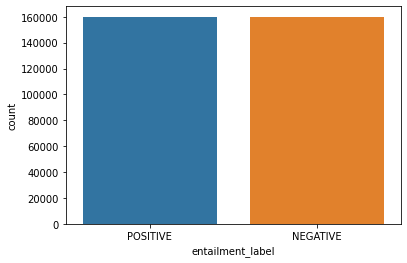

In [ ]:

sns.countplot(df['entailment_label'], label = 'Inferência das Setenças');

In [ ]:

dias = int(df.shape[0] * 0.2) # 20% do Dataset
train_df = df.iloc[:-dias,0:15].copy()
val_df = df.iloc[-dias:,0:15].copy()

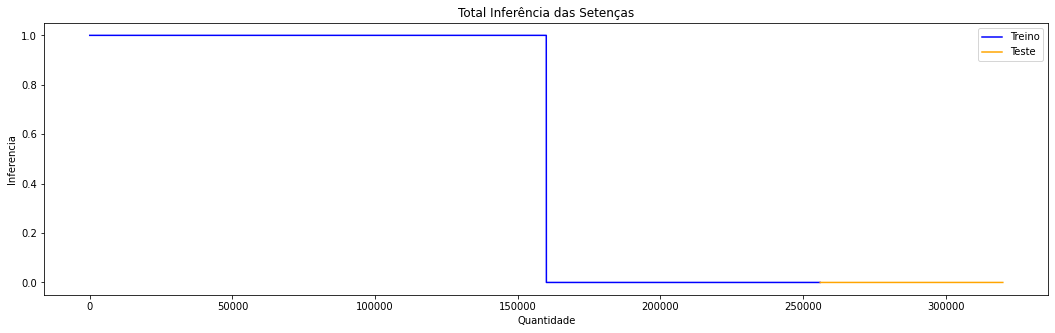

In [ ]:
plt.figure(figsize=(18,5))
plt.title('Total Inferência das Setenças')
plt.plot(train_df['entailment_label']=='POSITIVE', color='b')
plt.plot(val_df['entailment_label']=='POSITIVE', color='orange')
plt.legend(['Treino','Teste'])
# plt.yticks(np.arange(0, 1000, step=50))
plt.xlabel('Quantidade')
plt.ylabel('Inferencia')
plt.show()

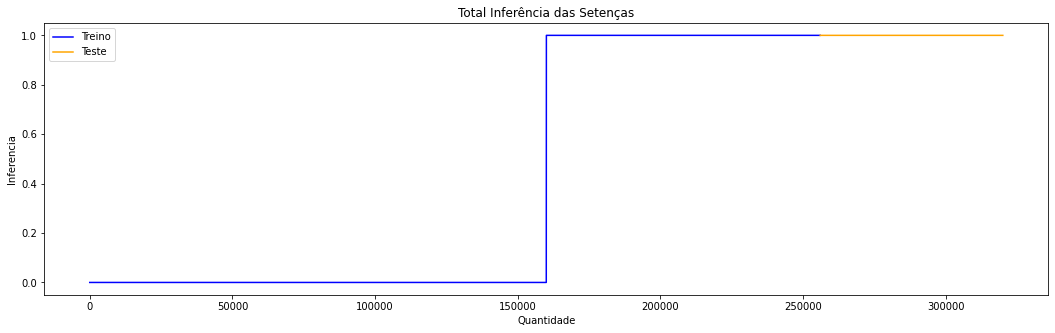

In [ ]:
plt.figure(figsize=(18,5))
plt.title('Total Inferência das Setenças')
plt.plot(train_df['entailment_label']=='NEGATIVE', color='b')
plt.plot(val_df['entailment_label']=='NEGATIVE', color='orange')
plt.legend(['Treino','Teste'])
# plt.yticks(np.arange(0, 1000, step=50))
plt.xlabel('Quantidade')
plt.ylabel('Inferencia')
plt.show()

In [ ]:
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import pickle
import os
import transformers
from transformers import BertTokenizer

In [ ]:
# Requires the latest pip
!pip install --upgrade pip

# Current stable release for CPU and GPU
!pip install tensorflow

     |████████████████████████████████| 1.7 MB 8.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


#### Model Fitted e Resultados do processo de treinamento (28/06/2021)

#### Execução com Held-Out-Data (Dados não vistos) (12/07/2021)

#### BERT

In [ ]:
class MNLIDataBert(Dataset):

  def __init__(self, train_df, val_df):
    self.label_dict = {'POSITIVE': 0, 'NEGATIVE': 1}

    self.train_df = train_df
    self.val_df = val_df

    self.base_path = '/content/'
    self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True) # Using a pre-trained BERT tokenizer to encode sentences
    self.train_data = None
    self.val_data = None
    self.init_data()

  def init_data(self):
    self.train_data = self.load_data(self.train_df)
    self.val_data = self.load_data(self.val_df)

  def load_data(self, df):
    MAX_LEN = 512
    token_ids = []
    mask_ids = []
    seg_ids = []
    y = []

    premise_list = df['message_tratado'].to_list()
    hypothesis_list = df['response_tratado'].to_list()
    label_list = df['entailment_label'].to_list()

    for (premise, hypothesis, label) in zip(premise_list, hypothesis_list, label_list):
      premise_id = self.tokenizer.encode(premise, add_special_tokens = False)
      hypothesis_id = self.tokenizer.encode(hypothesis, add_special_tokens = False)
      pair_token_ids = [self.tokenizer.cls_token_id] + premise_id + [self.tokenizer.sep_token_id] + hypothesis_id + [self.tokenizer.sep_token_id]
      premise_len = len(premise_id)
      hypothesis_len = len(hypothesis_id)

      segment_ids = torch.tensor([0] * (premise_len + 2) + [1] * (hypothesis_len + 1))  # sentence 0 and sentence 1
      attention_mask_ids = torch.tensor([1] * (premise_len + hypothesis_len + 3))  # mask padded values

      token_ids.append(torch.tensor(pair_token_ids))
      seg_ids.append(segment_ids)
      mask_ids.append(attention_mask_ids)
      y.append(self.label_dict[label])
    
    token_ids = pad_sequence(token_ids, batch_first=True)
    mask_ids = pad_sequence(mask_ids, batch_first=True)
    seg_ids = pad_sequence(seg_ids, batch_first=True)
    y = torch.tensor(y)
    dataset = TensorDataset(token_ids, mask_ids, seg_ids, y)
    print(len(dataset))
    return dataset

  def get_data_loaders(self, batch_size=32, shuffle=True):
    train_loader = DataLoader(
      self.train_data,
      shuffle=shuffle,
      batch_size=batch_size
    )

    val_loader = DataLoader(
      self.val_data,
      shuffle=shuffle,
      batch_size=batch_size
    )

    return train_loader, val_loader
  
mnli_dataset = MNLIDataBert(train_df, val_df)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

256002
64000


In [ ]:
train_loader, val_loader = mnli_dataset.get_data_loaders(batch_size=16)

In [ ]:
from transformers import BertForSequenceClassification, AdamW

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.to(device)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
from transformers import BertForSequenceClassification, AdamW

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5, correct_bias=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 109,483,778 trainable parameters


In [ ]:
def multi_acc(y_pred, y_test):
  acc = (torch.log_softmax(y_pred, dim=1).argmax(dim=1) == y_test).sum().float() / float(y_test.size(0))
  return acc

In [ ]:
def multi_acc(y_pred, y_test):
  acc = (torch.log_softmax(y_pred, dim=1).argmax(dim=1) == y_test).sum().float() / float(y_test.size(0))
  return acc

import time

EPOCHS = 1

def train(model, train_loader, val_loader, optimizer):  
  total_step = len(train_loader)

  for epoch in range(EPOCHS):
    start = time.time()
    model.train()
    total_train_loss = 0
    total_train_acc  = 0
    for batch_idx, (pair_token_ids, mask_ids, seg_ids, y) in enumerate(train_loader):
      optimizer.zero_grad()
      pair_token_ids = pair_token_ids.to(device)
      mask_ids = mask_ids.to(device)
      seg_ids = seg_ids.to(device)
      labels = y.to(device)

      loss, prediction = model(pair_token_ids, 
                             token_type_ids=seg_ids, 
                             attention_mask=mask_ids, 
                             labels=labels).values()

      acc = multi_acc(prediction, labels)

      loss.backward()
      optimizer.step()
      
      total_train_loss += loss.item()
      total_train_acc  += acc.item()

    train_acc  = total_train_acc/len(train_loader)
    train_loss = total_train_loss/len(train_loader)
    model.eval()
    total_val_acc  = 0
    total_val_loss = 0
    with torch.no_grad():
      for batch_idx, (pair_token_ids, mask_ids, seg_ids, y) in enumerate(val_loader):
        optimizer.zero_grad()
        pair_token_ids = pair_token_ids.to(device)
        mask_ids = mask_ids.to(device)
        seg_ids = seg_ids.to(device)
        labels = y.to(device)
        
        loss, prediction = model(pair_token_ids, 
                             token_type_ids=seg_ids, 
                             attention_mask=mask_ids, 
                             labels=labels).values()
        
        acc = multi_acc(prediction, labels)

        total_val_loss += loss.item()
        total_val_acc  += acc.item()

    val_acc  = total_val_acc/len(val_loader)
    val_loss = total_val_loss/len(val_loader)
    end = time.time()
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)

    print(f'Epoch {epoch+1}: train_loss: {train_loss:.4f} train_acc: {train_acc:.4f} | val_loss: {val_loss:.4f} val_acc: {val_acc:.4f}')
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [ ]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
train(model, train_loader, val_loader, optimizer)

In [ ]:
def plot_scores(history):
    acc = [x['val_acc'] for x in history]
    plt.plot(acc, '-x')
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.title('acc vs. No. of epochs');

def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
plot_losses(history)

In [ ]:
def get_prediction(str):
 str = re.sub(r'[^a-zA-Z ]+', '', str)
 test_text = [str]
 model.eval()
 
 tokens_test_data = mnli_dataset.tokenizer(
 test_text,
 pad_to_max_length=True,
 truncation=True,
 return_token_type_ids=False
 )
 test_seq = torch.tensor(tokens_test_data['input_ids'])
 test_mask = torch.tensor(tokens_test_data['attention_mask'])
 
 preds = None
 with torch.no_grad():
   preds = model(test_seq.to(device), test_mask.to(device))

 preds = np.argmax(preds)
 print("Intent Identified: ", le.inverse_transform(preds)[0])
 return le.inverse_transform(preds)[0]

def get_response(message): 
  intent = get_prediction(message)
  for i in data['intents']: 
    if i["tag"] == intent:
      result = random.choice(i["responses"])
      break
  print(f"Response : {result}")
  return "Intent: "+ intent + '\n' + "Response: " + result

In [ ]:
get_response("why dont you introduce yourself")

In [ ]:
predictions = model.predict(x_test)